# Contents

## 1. Importing libraries and data¶

## 2. Data cleaning

## 3. Data prep for regression analysis

## 4. Regression analysis
 ###    Cocoa content vs Rating
 
## 5. Compare how the regression fits the training set
###     Cocoa content vs Rating

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [ ]:
# Using path method to import my dataset
"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [3]:
path = r"C:\Users\Peter\Desktop\Data Analytics documents\Data Immersion\Achievement 6"

In [4]:
# imported the dataset
df = pd.read_csv(os.path.join(path, 'Project','Chocolate_Bar_ratings_cleaned.csv'), index_col = False)

In [5]:
df.head()

,Company\n_Maker_if_ known,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\ncontent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [6]:
df.shape

(1793, 9)

## 2. Data Cleaning

In [7]:
# Check for missing values
df.isnull().sum()

Company\n_Maker_if_ known            0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\ncontent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

In [10]:
# checking for duplicate
dups = df.duplicated()

In [12]:
dups.shape # No dups

(1793,)

C:\Users\Peter\AppData\Local\Temp\ipykernel_9380\2577642051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'],bins = 25, kde = True)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

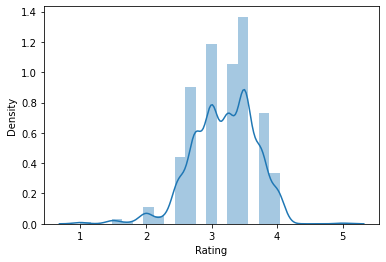

In [8]:
# Check for extreme values
sns.distplot(df['Rating'],bins = 25, kde = True)

In [9]:
# Check Mean
df['Rating'].mean()

3.185861684327942

In [13]:
# Check Median
df['Rating'].median()

3.25

In [14]:
# Check Max
df['Rating'].max()

5.0

In [15]:
# Check Min
df['Rating'].min()

1.0

## 3. Data prep for regression analysis

Hypothesis 1: The higher the coocoa content, the higher the rating

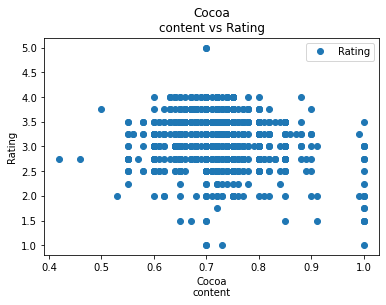

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cocoa\ncontent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa\ncontent vs Rating')  
plt.xlabel('Cocoa\ncontent')  
plt.ylabel('Rating')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Cocoa\ncontent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [19]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [20]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [21]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

## 4. Regression analysis

### Cocoa content vs Rating

In [22]:
# Create regression object
regression = LinearRegression()

In [23]:
# Fiting the regression to the training set of each variable.
regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

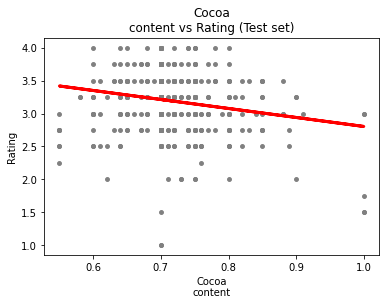

In [25]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa\ncontent vs Rating (Test set)')
plot_test.xlabel('Cocoa\ncontent')
plot_test.ylabel('Rating')
plot_test.show()

The linear model represented by the red regression line doesn’t perfectly cover all of my data points. The line does not cover some points at the cocoa content of 1, which contradict the hypothesis.

In [26]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.36471444]]
Mean squared error:  0.22105807302976896
R2 score:  0.013454761959848738


In [28]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.25,3.213285
1,3.25,3.145049
2,3.00,3.185991
3,3.25,3.213285
4,2.50,3.213285
5,2.75,3.145049
6,3.50,3.145049
7,3.75,3.185991
8,2.75,3.145049
9,3.25,3.213285


The negative slope value from the plot indicates a negative relationship, which implies that as Cocoa content rises, the rating drops. Also, the R2 score of 0.013 isn’t a great fit either. Though the MSE of 0.22 seems small to me, but i do not know how small MSE would be to be able to say that regression line passes fairly close to the observations, making it a good fit.

## Compare how the regression fits the training set¶

### Cocoa content vs Rating

In [29]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.36471444]]
Mean squared error:  0.22227113742581575
R2 score:  0.0322132050329752


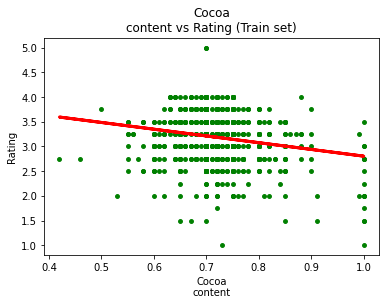

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa\ncontent vs Rating (Train set)')
plot_test.xlabel('Cocoa\ncontent')
plot_test.ylabel('Rating')
plot_test.show()

The result of this training set is very similar to that on the test set. With only a slight difference in the R2 values. Which means that the model fits the training set only slightly better than the test set. However, the hypothesis is not purely true that the higher the cocoa content the higher the Rating.  